In [1]:
import swan_vis as swan
import pandas as pd
import met_brewer
import seaborn as sns

In [2]:
swan_files = ['/Users/fairliereese/mortazavi_lab/bin/modelad_pipeline/ad007/test.p']

# keep track of metadatas
obs = pd.DataFrame()
for s in swan_files:
    sg = swan.read(s)
    obs = pd.concat([obs, sg.adata.obs], axis=0)

Read in graph from /Users/fairliereese/mortazavi_lab/bin/modelad_pipeline/ad007/test.p


In [3]:
# get unique genotypes, timepoints, tissues, etc
genotypes = obs.genotype.unique()
sex = obs.sex.unique()
ages = obs.age.unique()
tissues = obs.tissue.unique()

In [4]:
print(genotypes)
print(sex)
print(ages)
print(tissues)

['ABCA7_HO' '5xFADWT' '5xFADHEMI' '5xCLU-h2kbKI_HO' 'CLU-h2kbKI_HO']
['F']
['4_months']
['HC']


{0: '#2b9b81', 1: '#fe9b00', 2: '#f4c40f', 3: '#fbe183', 4: '#633372', 5: '#9b3441', 6: '#e6a2a6', 7: '#92c051', 8: '#1f6e9c', 9: '#9f5691', 10: '#e87b89'}


<AxesSubplot:xlabel='num'>

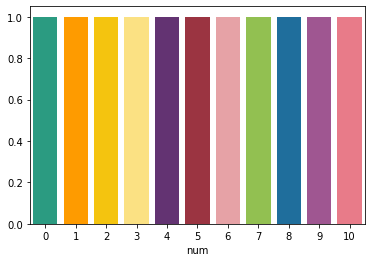

In [5]:
df = pd.DataFrame()
df['color'] = met_brewer.met_brew("Signac", n=11, brew_type="discrete")
df['num'] = df.index.tolist()
cmap = dict([(num, color) for num, color in zip(df.num.tolist(), df.color.tolist())])
print(cmap)
sns.barplot(df, y=[1 for i in range(len(df.index))], x='num', palette=cmap, saturation=1)

In [6]:
sg.adata.obs.genotype.unique()

array(['ABCA7_HO', '5xFADWT', '5xFADHEMI', '5xCLU-h2kbKI_HO',
       'CLU-h2kbKI_HO'], dtype=object)

In [7]:
g_cmap = {'5xFADHEMI': cmap[1],
          '5xFADWT': cmap[2],
          'CLU-h2kbKI_HO': cmap[0],
          '5xCLU-h2kbKI_HO': cmap[8],
          'ABCA7_HO': cmap[5]}
s_cmap = {'M': cmap[3],
          'F': cmap[7]}
t_cmap = {'CTX': cmap[9],
          'HC': cmap[10]}          

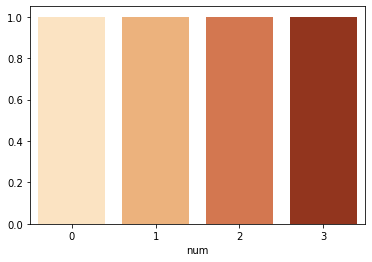

In [8]:
df = pd.DataFrame()
df['color'] = met_brewer.met_brew("OKeeffe2", n=4, brew_type="continuous")
df['num'] = df.index.tolist()
cmap = dict([(num, color) for num, color in zip(df.num.tolist(), df.color.tolist())])
sns.barplot(df, y=[1 for i in range(len(df.index))], x='num', palette=cmap, saturation=1)
order = ['8_weeks', 
         '10_weeks',
         '4_months',
         '18_months']
a_cmap = dict()
for i,t in enumerate(order):
    a_cmap[t] = cmap[i]

In [9]:
# swan_file = '/Users/fairliereese/mortazavi_lab/bin/modelad_pipeline/data/230516/swan/ad002/swan.p'
# sg = swan.read(swan_file)

In [10]:
sg.set_metadata_colors('genotype', g_cmap)
sg.set_metadata_colors('tissue', t_cmap)
sg.set_metadata_colors('sex', s_cmap)
sg.set_metadata_colors('age', a_cmap)

In [12]:
sg.save_graph('swan')

Saving graph as swan.p


In [12]:
def plot_report(sg, gene):
    study = sg.adata.obs.study.tolist()[0]
    sg.gen_report(g,
                  f'figures/{g}_{study}',
                  novelty=True,
                  cmap='viridis',
                  indicate_novel=True,
                  transcript_col='tname',
                  metadata_cols=['genotype', 'sex', 'tissue', 'age'],
                  datasets={'genotype': ['BIN1_HO', '5xBIN1_HO', '5xFADWT', '5xFADHEMI']})
    sg.gen_report(g,
                  f'figures/{g}_{study}',
                  novelty=True,
                  cmap='viridis',
                  transcript_col='tname',
                  display_numbers=True,
                  browser=True,
                  layer='pi',
                  metadata_cols=['genotype', 'sex', 'tissue', 'age'],
                  datasets={'genotype': ['BIN1_HO', '5xBIN1_HO', '5xFADWT', '5xFADHEMI']})

In [15]:
genes = ['App', 'Apoe', 'Gfap']
for g in genes: 
    plot_report(sg,g)


Plotting transcripts for ENSMUSG00000022892
Saving transcript path graph for ENSMUSG00000022892[1,1,1] as figures/App_ad007_novel_ENSMUSG00000022892[1,1,1]_path.png
Saving transcript path graph for ENSMUSG00000022892[1,1,3] as figures/App_ad007_novel_ENSMUSG00000022892[1,1,3]_path.png
Saving transcript path graph for ENSMUSG00000022892[2,7,1] as figures/App_ad007_novel_ENSMUSG00000022892[2,7,1]_path.png
Saving transcript path graph for ENSMUSG00000022892[1,3,1] as figures/App_ad007_novel_ENSMUSG00000022892[1,3,1]_path.png
Saving transcript path graph for ENSMUSG00000022892[1,1,8] as figures/App_ad007_novel_ENSMUSG00000022892[1,1,8]_path.png
Saving transcript path graph for ENSMUSG00000022892[1,6,1] as figures/App_ad007_novel_ENSMUSG00000022892[1,6,1]_path.png
Saving transcript path graph for ENSMUSG00000022892[1,2,1] as figures/App_ad007_novel_ENSMUSG00000022892[1,2,1]_path.png
Saving transcript path graph for ENSMUSG00000022892[1,15,1] as figures/App_ad007_novel_ENSMUSG00000022892[1,

In [11]:
sg.adata.obs.head()

,dataset,total_counts,batch,sample,mouse_id,genotype,sex,study,age,tissue,biorep_num,platform,talon_run_num
index,,,,,,,,,,,,,
ABCA7_HO_F_4_months_HC_1,ABCA7_HO_F_4_months_HC_1,3236103.0,0,ABCA7_HO_F_4_months_HC,11438,ABCA7_HO,F,ad007,4_months,HC,1,ONT,1
ABCA7_HO_F_4_months_HC_3,ABCA7_HO_F_4_months_HC_3,4208610.0,0,ABCA7_HO_F_4_months_HC,11448,ABCA7_HO,F,ad007,4_months,HC,3,ONT,1
ABCA7_HO_F_4_months_HC_2,ABCA7_HO_F_4_months_HC_2,2555530.0,0,ABCA7_HO_F_4_months_HC,11439,ABCA7_HO,F,ad007,4_months,HC,2,ONT,1
5xFADWT_F_4_months_HC_1,5xFADWT_F_4_months_HC_1,4943353.0,1,5xFADWT_F_4_months_HC,11627,5xFADWT,F,ad003,4_months,HC,1,ONT,1
5xFADHEMI_F_4_months_HC_1,5xFADHEMI_F_4_months_HC_1,4956181.0,1,5xFADHEMI_F_4_months_HC,11616,5xFADHEMI,F,ad003,4_months,HC,1,ONT,3


In [11]:
print(sg.adata.obs.sex.unique())
print(sg.adata.obs.age.unique())
print(sg.adata.obs.tissue.unique())
print(sg.adata.obs.genotype.unique())

['F']
Categories (1, object): ['F']
['4_months']
Categories (1, object): ['4_months']
['HC']
Categories (1, object): ['HC']
['ABCA7_HO', '5xFADWT', '5xFADHEMI', '5xCLU-h2kbKI_HO', 'CLU-h2kbKI_HO']
Categories (5, object): ['5xCLU-h2kbKI_HO', '5xFADHEMI', '5xFADWT', 'ABCA7_HO', 'CLU-h2kbKI_HO']


In [12]:
# ['5xBIN1_HO', '5xFADHEMI', '5xFADWT', 'BIN1_HO']

genotype_pairs = [['ABCA7_HO', '5xFADWT']]

In [13]:
for gs in genotype_pairs:
    g1 = gs[0]
    g2 = gs[1]
    
    print(f'Genotypes {g1}, {g2}')
    
    ofile = f'{g1}_{g2}_die.tsv'

    die, genes = sg.die_gene_test(obs_col='genotype',
                                  obs_conditions=[g1, g2],
                                  verbose=True)
    die.to_csv(ofile, sep='\t')

Genotypes ABCA7_HO, 5xFADWT


Testing for DIE for each gene: 100%|██████████| 25136/25136 [13:50<00:00, 34.76it/s]

In [14]:
die.head()

,gid,p_val,dpi,pos_iso_1,pos_iso_2,pos_iso_1_dpi,pos_iso_2_dpi,neg_iso_1,neg_iso_2,neg_iso_1_dpi,neg_iso_2_dpi,adj_p_val,gname
0,ENSMUSG00000000001,4.472293e-03,4.850746,"ENSMUSG00000000001[1,1,1]",NaN,4.850746,NaN,"ENSMUSG00000000001[2,2,1]",NaN,-4.850746,NaN,8.134033e-03,Gnai3
1,ENSMUSG00000000056,7.632207e-09,18.132316,"ENSMUSG00000000056[1,4,4]","ENSMUSG00000000056[2,2,2]",18.003761,0.128555,"ENSMUSG00000000056[4,4,1]","ENSMUSG00000000056[1,4,6]",-7.826087,-6.666667,3.498435e-08,Narf
2,ENSMUSG00000000058,8.330402e-02,1.107289,"ENSMUSG00000000058[1,2,2]","ENSMUSG00000000058[1,3,3]",0.790616,0.236967,"ENSMUSG00000000058[1,4,1]","ENSMUSG00000000058[1,1,1]",-0.919842,-0.187447,1.132715e-01,Cav2
3,ENSMUSG00000000078,1.122135e-05,11.560694,"ENSMUSG00000000078[1,1,5]",NaN,11.560694,NaN,"ENSMUSG00000000078[1,1,1]","ENSMUSG00000000078[1,2,3]",-10.174393,-0.423729,3.319039e-05,Klf6
4,ENSMUSG00000000085,1.340772e-20,57.732831,"ENSMUSG00000000085[1,5,3]","ENSMUSG00000000085[1,17,7]",17.037506,11.428572,"ENSMUSG00000000085[1,15,2]","ENSMUSG00000000085[1,17,2]",-50.653185,-7.079646,1.435669e-19,Scmh1


In [15]:
df = pd.read_csv(ofile, sep='\t')

In [16]:
df.head()

,Unnamed: 0,gid,p_val,dpi,pos_iso_1,pos_iso_2,pos_iso_1_dpi,pos_iso_2_dpi,neg_iso_1,neg_iso_2,neg_iso_1_dpi,neg_iso_2_dpi,adj_p_val,gname
0,0,ENSMUSG00000000001,4.472293e-03,4.850746,"ENSMUSG00000000001[1,1,1]",NaN,4.850746,NaN,"ENSMUSG00000000001[2,2,1]",NaN,-4.850746,NaN,8.134033e-03,Gnai3
1,1,ENSMUSG00000000056,7.632207e-09,18.132316,"ENSMUSG00000000056[1,4,4]","ENSMUSG00000000056[2,2,2]",18.003761,0.128555,"ENSMUSG00000000056[4,4,1]","ENSMUSG00000000056[1,4,6]",-7.826087,-6.666667,3.498435e-08,Narf
2,2,ENSMUSG00000000058,8.330402e-02,1.107289,"ENSMUSG00000000058[1,2,2]","ENSMUSG00000000058[1,3,3]",0.790616,0.236967,"ENSMUSG00000000058[1,4,1]","ENSMUSG00000000058[1,1,1]",-0.919842,-0.187447,1.132715e-01,Cav2
3,3,ENSMUSG00000000078,1.122135e-05,11.560694,"ENSMUSG00000000078[1,1,5]",NaN,11.560694,NaN,"ENSMUSG00000000078[1,1,1]","ENSMUSG00000000078[1,2,3]",-10.174393,-0.423729,3.319039e-05,Klf6
4,4,ENSMUSG00000000085,1.340772e-20,57.732831,"ENSMUSG00000000085[1,5,3]","ENSMUSG00000000085[1,17,7]",17.037506,11.428572,"ENSMUSG00000000085[1,15,2]","ENSMUSG00000000085[1,17,2]",-50.653185,-7.079646,1.435669e-19,Scmh1


In [17]:
# filter for things that are actually die
df = df.loc[(df.dpi >= 10)&(df.adj_p_val<=0.05)]

In [18]:
len(df.index)

5039

['ABCA7_HO', '5xFADWT', '5xFADHEMI', '5xCLU-h2kbKI_HO', 'CLU-h2kbKI_HO']
Categories (5, object): ['5xCLU-h2kbKI_HO', '5xFADHEMI', '5xFADWT', 'ABCA7_HO', 'CLU-h2kbKI_HO']

In [13]:
g_cmap

{'5xFADHEMI': '#fe9b00',
 '5xFADWT': '#f4c40f',
 'CLU-h2kbKI_HO': '#2b9b81',
 '5xCLU-h2kbKI_HO': '#1f6e9c',
 'ABCA7_HO': '#9b3441'}

In [ ]:
genes = ['Bin1', 'App', 'Apoe', 'Gfap']
# for s in swan_files:
#     sg = swan.read(s)
sg.set_metadata_colors('genotype', g_cmap)
sg.set_metadata_colors('tissue', t_cmap)
sg.set_metadata_colors('sex', s_cmap)
sg.set_metadata_colors('age', a_cmap)
study = sg.adata.obs.study.tolist()[0]
for g in genes:
    sg.gen_report(g,
                  f'figures/{g}_{study}',
                  novelty=True,
                  cmap='viridis',
                  indicate_novel=True,
                  transcript_col='tname',
                  metadata_cols=['genotype', 'sex', 'tissue', 'age'],
                  datasets={'genotype': ['BIN1_HO', '5xBIN1_HO', '5xFADWT', '5xFADHEMI']})
    sg.gen_report(g,
                  f'figures/{g}_{study}',
                  novelty=True,
                  cmap='viridis',
                  transcript_col='tname',
                  display_numbers=True,
                  browser=True,
                  layer='pi',
                  metadata_cols=['genotype', 'sex', 'tissue', 'age'],
                  datasets={'genotype': ['BIN1_HO', '5xBIN1_HO', '5xFADWT', '5xFADHEMI']})


Plotting transcripts for ENSMUSG00000024381
Saving transcript path graph for ENSMUSG00000024381[1,9,1] as figures/Bin1_ad007_novel_ENSMUSG00000024381[1,9,1]_path.png
Saving transcript path graph for ENSMUSG00000024381[1,2,1] as figures/Bin1_ad007_novel_ENSMUSG00000024381[1,2,1]_path.png
Saving transcript path graph for ENSMUSG00000024381[1,4,1] as figures/Bin1_ad007_novel_ENSMUSG00000024381[1,4,1]_path.png
Saving transcript path graph for ENSMUSG00000024381[1,3,1] as figures/Bin1_ad007_novel_ENSMUSG00000024381[1,3,1]_path.png
Saving transcript path graph for ENSMUSG00000024381[1,12,1] as figures/Bin1_ad007_novel_ENSMUSG00000024381[1,12,1]_path.png
Saving transcript path graph for ENSMUSG00000024381[1,20,1] as figures/Bin1_ad007_novel_ENSMUSG00000024381[1,20,1]_path.png
Saving transcript path graph for ENSMUSG00000024381[1,16,1] as figures/Bin1_ad007_novel_ENSMUSG00000024381[1,16,1]_path.png
Saving transcript path graph for ENSMUSG00000024381[1,3,2] as figures/Bin1_ad007_novel_ENSMUSG0

In [ ]:
import swan_vis as swan

In [12]:
swan_file = '/Users/fairliereese/mortazavi_lab/bin/modelad_pipeline/data/230516/swan/ad002/swan.p'
study = 'ad002'      
g = 'Apoe'
sg = swan.read(swan_file)
sg.set_metadata_colors('genotype', g_cmap)
sg.set_metadata_colors('tissue', t_cmap)
sg.set_metadata_colors('sex', s_cmap)
sg.set_metadata_colors('age', a_cmap)
sg.gen_report(g,
              f'figures/{g}_{study}',
              novelty=True,
              cmap='viridis',
              indicate_novel=True,
              transcript_col='tname',
              metadata_cols=['genotype', 'sex', 'tissue', 'age'],
              datasets={'genotype': sg.adata.obs.genotype.unique().tolist()})
sg.gen_report(g,
              f'figures/{g}_{study}',
              novelty=True,
              cmap='magma',
              transcript_col='tname',
              display_numbers=True,
              browser=True,
              layer='pi',
              metadata_cols=['genotype', 'sex', 'tissue', 'age'],
              datasets={'genotype': sg.adata.obs.genotype.unique().tolist()})

Read in graph from /Users/fairliereese/mortazavi_lab/bin/modelad_pipeline/data/230516/swan/ad002/swan.p

Plotting transcripts for ENSMUSG00000002985
Saving transcript path graph for ENSMUSG00000002985[2,3,2] as figures/Apoe_ad002_novel_ENSMUSG00000002985[2,3,2]_path.png
Saving transcript path graph for ENSMUSG00000002985[1,1,2] as figures/Apoe_ad002_novel_ENSMUSG00000002985[1,1,2]_path.png
Saving transcript path graph for ENSMUSG00000002985[2,3,1] as figures/Apoe_ad002_novel_ENSMUSG00000002985[2,3,1]_path.png
Saving transcript path graph for ENSMUSG00000002985[2,15,2] as figures/Apoe_ad002_novel_ENSMUSG00000002985[2,15,2]_path.png
Saving transcript path graph for ENSMUSG00000002985[2,14,2] as figures/Apoe_ad002_novel_ENSMUSG00000002985[2,14,2]_path.png
Saving transcript path graph for ENSMUSG00000002985[2,13,2] as figures/Apoe_ad002_novel_ENSMUSG00000002985[2,13,2]_path.png
Saving transcript path graph for ENSMUSG00000002985[2,6,2] as figures/Apoe_ad002_novel_ENSMUSG00000002985[2,6,2]_

In [13]:
import cerberus

In [14]:
ca = cerberus.read('data/230516/cerberus/ad002/ca_annot.h5')

In [16]:
tnames = ['Apoe-206', 'Apoe-210']
ca.t_map.loc[ca.t_map.original_transcript_name.isin(tnames)]

,original_transcript_id,ic,ic_id,tss_id,tss,tes_id,tes,gene_id,gene_name,original_transcript_name,transcript_triplet,transcript_id,transcript_name,tss_first_sd_issue,tes_last_sa_issue,source
116625,ENSMUST00000174064.8,3,ENSMUSG00000002985_3,ENSMUSG00000002985_2,2,ENSMUSG00000002985_1,1,ENSMUSG00000002985,Apoe,Apoe-206,"[2,3,1]","ENSMUSG00000002985[2,3,1]","Apoe[2,3,1]",False,False,vM21
116676,ENSMUST00000174710.1,6,ENSMUSG00000002985_6,ENSMUSG00000002985_2,2,ENSMUSG00000002985_3,3,ENSMUSG00000002985,Apoe,Apoe-210,"[2,6,3]","ENSMUSG00000002985[2,6,3]","Apoe[2,6,3]",False,False,vM21
76177,ENSMUST00000174064.8,3,ENSMUSG00000002985_3,ENSMUSG00000002985_2,2,ENSMUSG00000002985_1,1,ENSMUSG00000002985,Apoe,Apoe-206,"[2,3,1]","ENSMUSG00000002985[2,3,1]","Apoe[2,3,1]",False,False,ad002
76178,ENSMUST00000174064.8#0,3,ENSMUSG00000002985_3,ENSMUSG00000002985_2,2,ENSMUSG00000002985_2,2,ENSMUSG00000002985,Apoe,Apoe-206,"[2,3,2]","ENSMUSG00000002985[2,3,2]","Apoe[2,3,2]",False,False,ad002
76179,ENSMUST00000174064.8#1,3,ENSMUSG00000002985_3,ENSMUSG00000002985_2,2,ENSMUSG00000002985_2,2,ENSMUSG00000002985,Apoe,Apoe-206,"[2,3,2]","ENSMUSG00000002985[2,3,2]","Apoe[2,3,2]",False,False,ad002
76180,ENSMUST00000174064.8#2,3,ENSMUSG00000002985_3,ENSMUSG00000002985_2,2,ENSMUSG00000002985_2,2,ENSMUSG00000002985,Apoe,Apoe-206,"[2,3,2]","ENSMUSG00000002985[2,3,2]","Apoe[2,3,2]",False,False,ad002
76181,ENSMUST00000174064.8#3,3,ENSMUSG00000002985_3,ENSMUSG00000002985_2,2,ENSMUSG00000002985_2,2,ENSMUSG00000002985,Apoe,Apoe-206,"[2,3,2]","ENSMUSG00000002985[2,3,2]","Apoe[2,3,2]",False,False,ad002
76190,ENSMUST00000174710.1,6,ENSMUSG00000002985_6,ENSMUSG00000002985_2,2,ENSMUSG00000002985_3,3,ENSMUSG00000002985,Apoe,Apoe-210,"[2,6,3]","ENSMUSG00000002985[2,6,3]","Apoe[2,6,3]",False,False,ad002
76191,ENSMUST00000174710.1#0,6,ENSMUSG00000002985_6,ENSMUSG00000002985_2,2,ENSMUSG00000002985_2,2,ENSMUSG00000002985,Apoe,Apoe-210,"[2,6,2]","ENSMUSG00000002985[2,6,2]","Apoe[2,6,2]",False,False,ad002
76192,ENSMUST00000174710.1#1,6,ENSMUSG00000002985_6,ENSMUSG00000002985_2,2,ENSMUSG00000002985_2,2,ENSMUSG00000002985,Apoe,Apoe-210,"[2,6,2]","ENSMUSG00000002985[2,6,2]","Apoe[2,6,2]",False,False,ad002
